Problem 1

(array([4.000e+00, 2.000e+00, 9.000e+00, 1.200e+01, 1.100e+01, 1.900e+01,
        1.700e+01, 3.700e+01, 3.100e+01, 4.400e+01, 4.200e+01, 4.800e+01,
        4.500e+01, 5.700e+01, 6.100e+01, 8.100e+01, 1.020e+02, 1.060e+02,
        9.400e+01, 1.060e+02, 1.170e+02, 1.270e+02, 1.340e+02, 1.350e+02,
        1.430e+02, 1.770e+02, 2.000e+02, 1.720e+02, 2.090e+02, 2.340e+02,
        2.180e+02, 2.230e+02, 2.700e+02, 2.890e+02, 3.080e+02, 3.440e+02,
        3.360e+02, 3.510e+02, 3.510e+02, 3.860e+02, 3.980e+02, 4.030e+02,
        4.540e+02, 4.720e+02, 4.640e+02, 5.670e+02, 5.450e+02, 5.990e+02,
        6.170e+02, 6.020e+02, 7.140e+02, 6.830e+02, 7.370e+02, 7.400e+02,
        7.530e+02, 7.910e+02, 8.740e+02, 8.410e+02, 8.610e+02, 9.030e+02,
        9.270e+02, 1.022e+03, 1.015e+03, 1.079e+03, 1.159e+03, 1.188e+03,
        1.184e+03, 1.285e+03, 1.322e+03, 1.360e+03, 1.468e+03, 1.445e+03,
        1.477e+03, 1.595e+03, 1.607e+03, 1.632e+03, 1.736e+03, 1.700e+03,
        1.790e+03, 1.942e+03, 1.936e+0

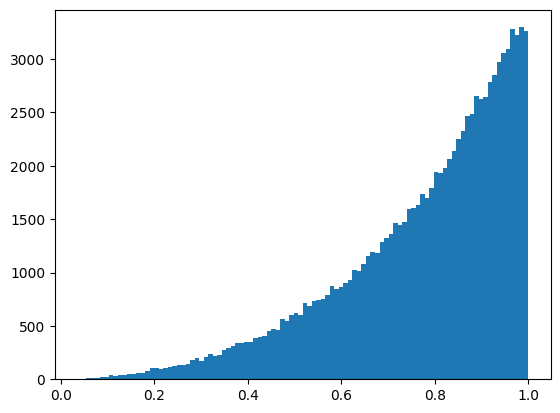

In [336]:
import numpy as np
import matplotlib.pyplot as plt


def problem1_inversion(n_samples=1000):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections
    # Return a numpy array of length n_samples

    accepted_samples = []

    target = lambda x: np.clip((np.exp(x ** 2) - 1) / (np.e - 1), 0, 1)
    proposal = lambda x: 1

    while len(accepted_samples) < n_samples:
        x = np.random.uniform(1e-6, 1)
        u = np.random.uniform(1e-6, 1)  # Uniform random for acceptance criterion

        if u <= 1.1 * target(x):
            accepted_samples.append(x)  # Accept x

    return np.array(accepted_samples)


accepted_samples = problem1_inversion(n_samples=100000)

plt.hist(accepted_samples, bins=100)

Problem 2 (This is exacly the same as an assignment)

Problem 3

In [337]:
# PART 1
#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

import numpy as np

problem3_A = np.array([[0.8, 0.2, 0.0, 0.0],
                       [0.6, 0.2, 0.2, 0.0],
                       [0.0, 0.4, 0.0, 0.6],
                       [0.0, 0.0, 0.8, 0.2]])

problem3_B = np.array([[0.0, 0.2, 0.0, 0.8],
                       [0.0, 0.0, 1.0, 0.0],
                       [0.0, 1.0, 0.0, 0.0],
                       [0.5, 0.0, 0.5, 0.0]])

problem3_C = np.array([[0.2, 0.3, 0.0, 0.0, 0.5],
                       [0.2, 0.2, 0.6, 0.0, 0.0],
                       [0.0, 0.4, 0.0, 0.6, 0.0],
                       [0.0, 0.0, 0.0, 0.6, 0.4],
                       [0.0, 0.0, 0.0, 0.4, 0.6]])

problem3_D = np.array([[0.8, 0.2, 0.0, 0.0],
                       [0.6, 0.2, 0.2, 0.0],
                       [0.0, 0.4, 0.0, 0.6],
                       [0.1, 0.0, 0.7, 0.2]])

In [338]:
'''
To check for irreducibility, raise the matrix to a high power
and check for convergence. No elements should approach 0.
'''


def check_irreducibility(lst):
    if isinstance(lst, list):
        pass
    else:
        raise Exception("Input to check_irreducibility() must be a LIST!")

    i = 0
    for matrix in lst:
        if matrix.shape[0] != matrix.shape[1]:
            raise Exception(f"Matrix #{i} is not square!")
        matrix_inf = np.linalg.matrix_power(matrix, 1000)
        if np.any(matrix_inf < 1e-10):
            print(f"Matrix #{i} is REDUCIBLE!.")
            # print(matrix)
        else:
            print(f"Matrix #{i} is irreducible.")

        i += 1


check_irreducibility([problem3_A, problem3_B, problem3_C, problem3_D])

problem3_A_irreducible = True
problem3_B_irreducible = False
problem3_C_irreducible = False
problem3_D_irreducible = True

Matrix #0 is irreducible.
Matrix #1 is REDUCIBLE!.
Matrix #2 is REDUCIBLE!.
Matrix #3 is irreducible.


In [339]:

import numpy as np
import numpy as np

def stat_distr(p):
    A = p.T - np.eye(p.shape[0])
    b = np.zeros(p.shape[0])

    A[-1] = 1
    b[-1] = 1

    return np.linalg.solve(A, b)

def reversible_markov(A):
    n = len(A)

    # Step 1: Find the stationary distribution
    stationary_dist = stat_distr(A)

    # Step 2: Check the detailed balance condition for all pairs (i, j)
    for i in range(n):
        for j in range(n):
            if not np.isclose(stationary_dist[i] * A[i, j], stationary_dist[j] * A[j, i]):
                print(f"Chain is not reversible. Detailed balance is violated between states {i} and {j}.")
                return False  # Early exit if any violation is found

    print("Chain is reversible!")
    return True

reversible_markov(problem3_D)







Chain is not reversible. Detailed balance is violated between states 0 and 1.


False

Problem 4

Problem 5